In [41]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

print("="*60)
print("GENERATING REALISTIC CLOTHING RESALE DATASET")
print("="*60)

# Define realistic categories based on thrifting/resale
brands = {
    'premium': ['Patagonia', 'The North Face', 'Carhartt', 'Levi\'s', 'Nike', 'Adidas'],
    'mid': ['Gap', 'Old Navy', 'American Eagle', 'H&M', 'Zara', 'Uniqlo'],
    'budget': ['Walmart', 'Target', 'Shein', 'Forever 21', 'Primark', 'Fashion Nova']
}

categories = {
    'expensive': ['Jacket', 'Coat', 'Boots', 'Dress'],
    'moderate': ['Jeans', 'Sweater', 'Hoodie', 'Sneakers'],
    'cheap': ['T-shirt', 'Tank Top', 'Shorts', 'Socks']
}

conditions = ['New with Tags', 'Like New', 'Excellent', 'Good', 'Fair']
materials = ['Cotton', 'Polyester', 'Wool', 'Denim', 'Leather', 'Synthetic', 'Nylon']
colors = ['Black', 'White', 'Blue', 'Red', 'Green', 'Gray', 'Brown', 'Navy', 'Beige']
sizes = ['XS', 'S', 'M', 'L', 'XL', 'XXL']

def calculate_realistic_price(brand_tier, category_tier, condition, material):
    """
    Calculate a realistic resale price based on attributes
    """
    # Base price by category
    if category_tier == 'expensive':
        base_price = random.uniform(40, 80)
    elif category_tier == 'moderate':
        base_price = random.uniform(20, 50)
    else:
        base_price = random.uniform(5, 25)
    
    # Brand multiplier
    if brand_tier == 'premium':
        base_price *= random.uniform(1.5, 2.5)
    elif brand_tier == 'mid':
        base_price *= random.uniform(1.0, 1.5)
    else:
        base_price *= random.uniform(0.5, 1.0)
    
    # Condition multiplier
    condition_multipliers = {
        'New with Tags': 1.3,
        'Like New': 1.15,
        'Excellent': 1.0,
        'Good': 0.75,
        'Fair': 0.5
    }
    base_price *= condition_multipliers[condition]
    
    # Material bonus
    if material in ['Wool', 'Leather']:
        base_price *= random.uniform(1.2, 1.5)
    elif material in ['Cotton', 'Denim']:
        base_price *= random.uniform(1.0, 1.2)
    
    # Add some realistic noise
    noise = random.uniform(0.9, 1.1)
    final_price = base_price * noise
    
    # Round to realistic prices
    if final_price < 20:
        return round(final_price)
    else:
        return round(final_price / 5) * 5  # Round to nearest $5

# Generate dataset
num_samples = 1000
data = []

print(f"\nGenerating {num_samples} realistic clothing items...")

for i in range(num_samples):
    # Select random attributes
    brand_tier = random.choice(['premium', 'mid', 'budget'])
    brand = random.choice(brands[brand_tier])
    
    category_tier = random.choice(['expensive', 'moderate', 'cheap'])
    category = random.choice(categories[category_tier])
    
    condition = random.choice(conditions)
    material = random.choice(materials)
    color = random.choice(colors)
    size = random.choice(sizes)
    
    # Calculate realistic price
    price = calculate_realistic_price(brand_tier, category_tier, condition, material)
    
    data.append({
        'Brand': brand,
        'Category': category,
        'Condition': condition,
        'Material': material,
        'Color': color,
        'Size': size,
        'Price': price
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('clothing_resale_data.csv', index=False)

print(f"✓ Generated {len(df)} items")
print(f"✓ Saved to 'clothing_resale_data.csv'")

print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)

print(f"\nTotal items: {len(df)}")
print(f"Price range: ${df['Price'].min()} - ${df['Price'].max()}")
print(f"Average price: ${df['Price'].mean():.2f}")
print(f"Median price: ${df['Price'].median():.2f}")

print("\n" + "="*60)
print("SAMPLE DATA")
print("="*60)
print(df.head(10))

print("\n" + "="*60)
print("UNIQUE VALUES PER COLUMN")
print("="*60)
for col in df.columns:
    if col != 'Price':
        print(f"{col}: {df[col].nunique()} unique values")

print("\n" + "="*60)
print("PRICE BY BRAND (showing realistic patterns)")
print("="*60)
print(df.groupby('Brand')['Price'].mean().sort_values(ascending=False))

print("\n" + "="*60)
print("PRICE BY CATEGORY (showing realistic patterns)")
print("="*60)
print(df.groupby('Category')['Price'].mean().sort_values(ascending=False))

print("\n" + "="*60)
print("PRICE BY CONDITION (showing realistic patterns)")
print("="*60)
print(df.groupby('Condition')['Price'].mean().sort_values(ascending=False))

print("\n✓ Dataset ready for ML modeling!")

GENERATING REALISTIC CLOTHING RESALE DATASET

Generating 1000 realistic clothing items...
✓ Generated 1000 items
✓ Saved to 'clothing_resale_data.csv'

DATASET SUMMARY

Total items: 1000
Price range: $2 - $325
Average price: $49.37
Median price: $35.00

SAMPLE DATA
            Brand  Category      Condition   Material  Color Size  Price
0         Walmart     Boots       Like New  Polyester   Blue  XXL     45
1      Forever 21    Jacket  New with Tags  Polyester    Red   XL     70
2         Primark   Sweater           Good    Leather  Green   XS     25
3        Carhartt    Jacket           Good     Cotton   Gray    M    130
4             Gap    Shorts           Fair      Nylon   Gray   XL      5
5             Gap    Jacket           Good       Wool   Navy  XXL     80
6    Fashion Nova   T-shirt           Fair  Synthetic   Blue   XL      6
7    Fashion Nova  Tank Top      Excellent      Nylon  Black    S     19
8  The North Face    Shorts       Like New  Synthetic   Navy    L     50
9  T

In [43]:
import pandas as pd

# Load the new dataset
df = pd.read_csv('clothing_resale_data.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset loaded successfully!
Shape: (1000, 7)

First few rows:
        Brand Category      Condition   Material  Color Size  Price
0     Walmart    Boots       Like New  Polyester   Blue  XXL     45
1  Forever 21   Jacket  New with Tags  Polyester    Red   XL     70
2     Primark  Sweater           Good    Leather  Green   XS     25
3    Carhartt   Jacket           Good     Cotton   Gray    M    130
4         Gap   Shorts           Fair      Nylon   Gray   XL      5


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("="*60)
print("STEP 1: PREPARING DATA FOR MACHINE LEARNING")
print("="*60)

# Create a copy of our data
df_ml = df.copy()

# Encode categorical variables (convert text to numbers)
label_encoders = {}
categorical_columns = ['Brand', 'Category', 'Condition', 'Material', 'Color', 'Size']

for col in categorical_columns:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}")

# Separate features (X) and target (y)
X = df_ml.drop('Price', axis=1)
y = df_ml['Price']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

print("\n" + "="*60)
print("STEP 2: TRAINING MODELS")
print("="*60)

# Model 1: Linear Regression
print("\n1. Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("✓ Done!")

# Model 2: Random Forest
print("\n2. Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("✓ Done!")

# Model 3: Gradient Boosting (powerful model)
print("\n3. Training Gradient Boosting...")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("✓ Done!")

print("\n" + "="*60)
print("STEP 3: EVALUATING MODELS")
print("="*60)

models = {
    'Linear Regression': (lr_predictions, lr_model),
    'Random Forest': (rf_predictions, rf_model),
    'Gradient Boosting': (gb_predictions, gb_model)
}

results = []

for model_name, (predictions, model) in models.items():
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    
    results.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f"\n{model_name} Results:")
    print(f"  MAE (Mean Absolute Error): ${mae:.2f}")
    print(f"  RMSE (Root Mean Squared Error): ${rmse:.2f}")
    print(f"  R² Score: {r2:.4f} ({r2*100:.2f}% of variance explained)")

# Find best model
results_df = pd.DataFrame(results)
best_model = results_df.loc[results_df['R2'].idxmax()]

print("\n" + "="*60)
print(f"🏆 WINNER: {best_model['Model']}")
print(f"   R² Score: {best_model['R2']:.4f} ({best_model['R2']*100:.2f}%)")
print(f"   Average Error: ${best_model['MAE']:.2f}")
print("="*60)

# Show some example predictions
print("\n" + "="*60)
print("SAMPLE PREDICTIONS (First 10 test items)")
print("="*60)
print(f"{'Actual Price':<15} {'Predicted':<15} {'Difference':<15}")
print("-"*45)
for i in range(10):
    actual = y_test.iloc[i]
    predicted = rf_predictions[i]  # Using Random Forest
    diff = actual - predicted
    print(f"${actual:<14} ${predicted:<14.2f} ${diff:<14.2f}")

STEP 1: PREPARING DATA FOR MACHINE LEARNING
✓ Encoded Brand
✓ Encoded Category
✓ Encoded Condition
✓ Encoded Material
✓ Encoded Color
✓ Encoded Size

Features shape: (1000, 6)
Target shape: (1000,)

Training set: 800 samples
Testing set: 200 samples

STEP 2: TRAINING MODELS

1. Training Linear Regression...
✓ Done!

2. Training Random Forest...
✓ Done!

3. Training Gradient Boosting...
✓ Done!

STEP 3: EVALUATING MODELS

Linear Regression Results:
  MAE (Mean Absolute Error): $26.67
  RMSE (Root Mean Squared Error): $38.28
  R² Score: 0.3390 (33.90% of variance explained)

Random Forest Results:
  MAE (Mean Absolute Error): $19.26
  RMSE (Root Mean Squared Error): $29.63
  R² Score: 0.6040 (60.40% of variance explained)

Gradient Boosting Results:
  MAE (Mean Absolute Error): $15.58
  RMSE (Root Mean Squared Error): $24.70
  R² Score: 0.7249 (72.49% of variance explained)

🏆 WINNER: Gradient Boosting
   R² Score: 0.7249 (72.49%)
   Average Error: $15.58

SAMPLE PREDICTIONS (First 10 te

VISUALIZING MODEL PERFORMANCE


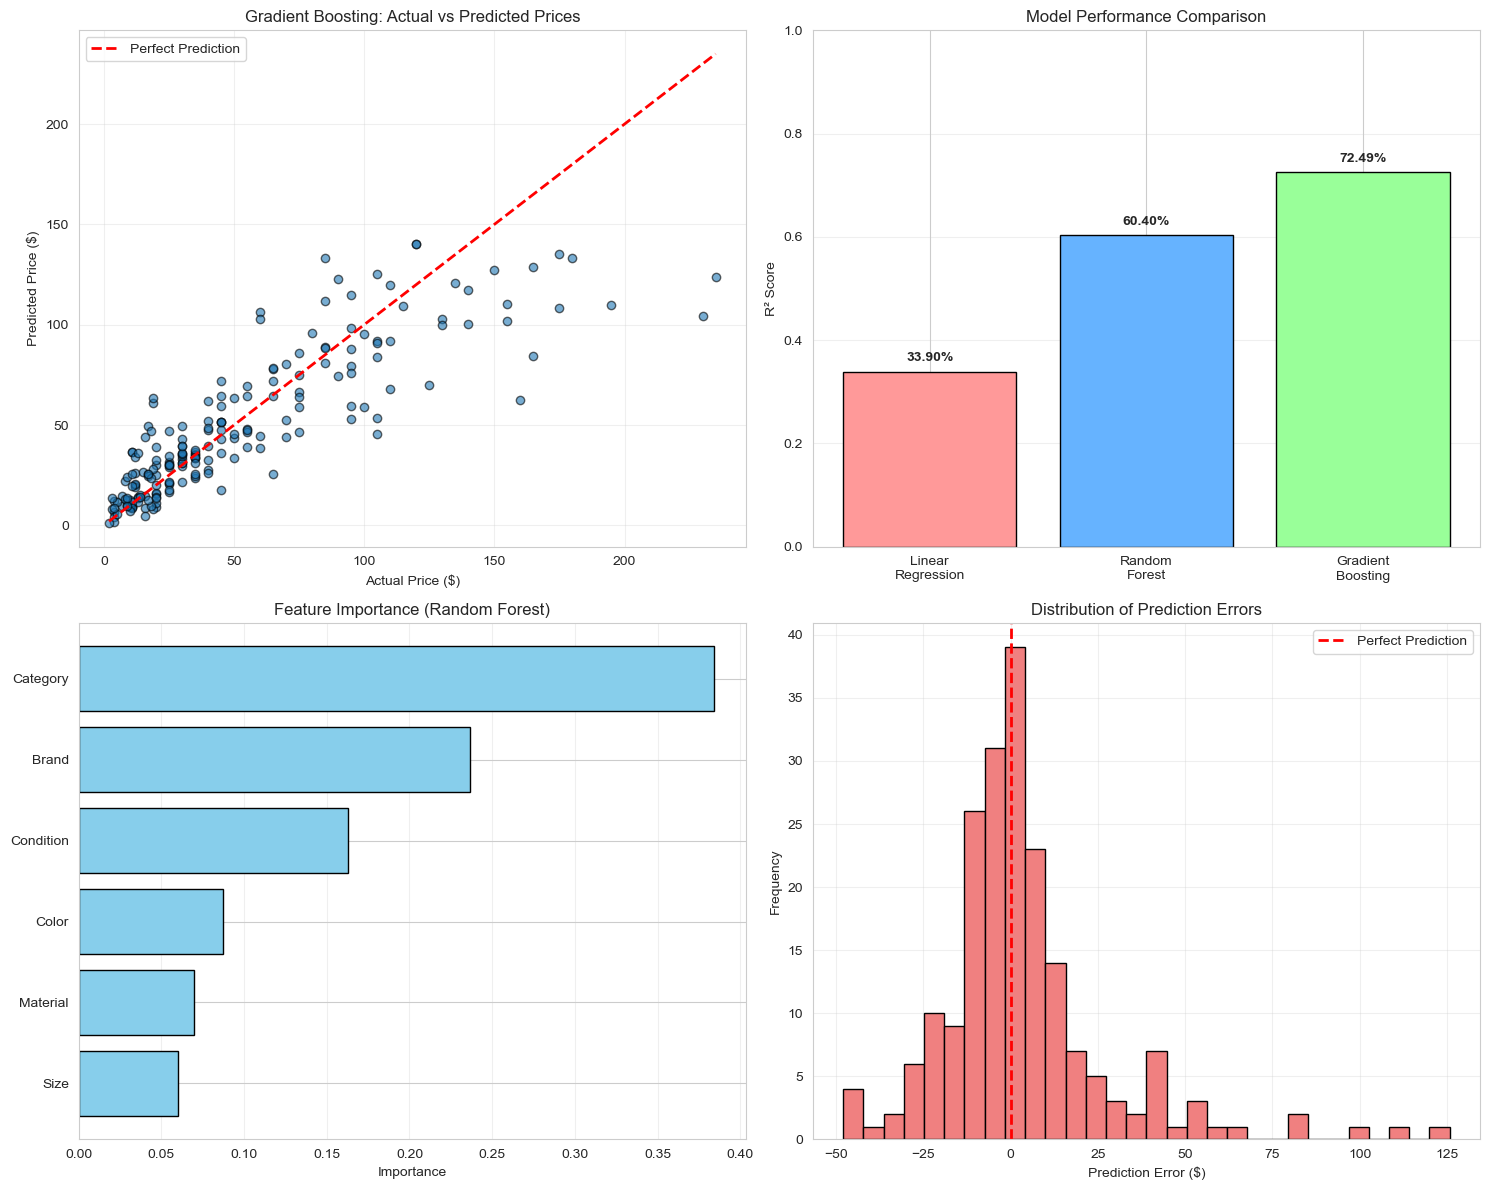


✓ Visualizations complete!


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

print("="*60)
print("VISUALIZING MODEL PERFORMANCE")
print("="*60)

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted (Gradient Boosting)
axes[0, 0].scatter(y_test, gb_predictions, alpha=0.6, edgecolors='k')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title('Gradient Boosting: Actual vs Predicted Prices')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Model Comparison
model_names = ['Linear\nRegression', 'Random\nForest', 'Gradient\nBoosting']
r2_scores = [results_df.iloc[0]['R2'], results_df.iloc[1]['R2'], results_df.iloc[2]['R2']]
colors = ['#ff9999', '#66b3ff', '#99ff99']

axes[0, 1].bar(model_names, r2_scores, color=colors, edgecolor='black')
axes[0, 1].set_ylabel('R² Score')
axes[0, 1].set_title('Model Performance Comparison')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(r2_scores):
    axes[0, 1].text(i, v + 0.02, f'{v:.2%}', ha='center', fontweight='bold')

# 3. Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': ['Brand', 'Category', 'Condition', 'Material', 'Color', 'Size'],
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1, 0].barh(feature_importance['Feature'], feature_importance['Importance'], 
                color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Importance')
axes[1, 0].set_title('Feature Importance (Random Forest)')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# 4. Prediction Error Distribution
errors = y_test - gb_predictions
axes[1, 1].hist(errors, bins=30, edgecolor='black', color='lightcoral')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Prediction Error ($)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations complete!")

In [55]:
def predict_price(brand, category, condition, material, color, size):
    """
    Predict the resale price of a clothing item
    """
    # Create a sample item
    item = pd.DataFrame({
        'Brand': [brand],
        'Category': [category],
        'Condition': [condition],
        'Material': [material],
        'Color': [color],
        'Size': [size]
    })
    
    # Encode the features
    for col in categorical_columns:
        item[col] = label_encoders[col].transform(item[col])
    
    # Make prediction
    prediction = gb_model.predict(item)[0]
    
    return round(prediction, 2)

# Test it out!
print("="*60)
print("TESTING THE MODEL WITH NEW ITEMS")
print("="*60)

test_items = [
    ("Patagonia", "Jacket", "Like New", "Wool", "Black", "L"),
    ("H&M", "T-shirt", "Good", "Cotton", "White", "M"),
    ("Nike", "Sneakers", "Excellent", "Synthetic", "Black", "L"),
    ("Carhartt", "Jeans", "New with Tags", "Denim", "Blue", "M"),
]

for brand, category, condition, material, color, size in test_items:
    price = predict_price(brand, category, condition, material, color, size)
    print(f"\n{brand} {category} ({condition}, {material}, {color}, {size})")
    print(f"  Predicted Price: ${price}")

TESTING THE MODEL WITH NEW ITEMS

Patagonia Jacket (Like New, Wool, Black, L)
  Predicted Price: $139.04

H&M T-shirt (Good, Cotton, White, M)
  Predicted Price: $15.8

Nike Sneakers (Excellent, Synthetic, Black, L)
  Predicted Price: $58.6

Carhartt Jeans (New with Tags, Denim, Blue, M)
  Predicted Price: $111.11


In [57]:
import pickle

# Save the model
with open('clothing_price_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

# Save the encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("✓ Model and encoders saved successfully!")
print("  - clothing_price_model.pkl")
print("  - label_encoders.pkl")

✓ Model and encoders saved successfully!
  - clothing_price_model.pkl
  - label_encoders.pkl
